In [1]:
# importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn import externals

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import sklearn as slr
from sklearn.metrics import f1_score

## Question 1
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

In [2]:
# load the dataset
df=pd.read_csv(r"C:\Users\Asus\Downloads\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
df.shape

(400, 11)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


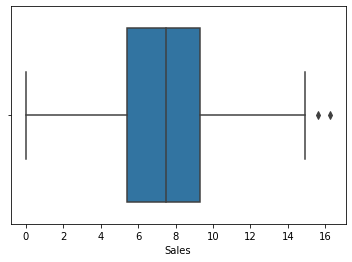

In [8]:
# finding the outlier
ax=sns.boxplot(df['Sales'])
plt.show()

Skew:0.18556036318721578
Kurtosis:-0.08087736743346197


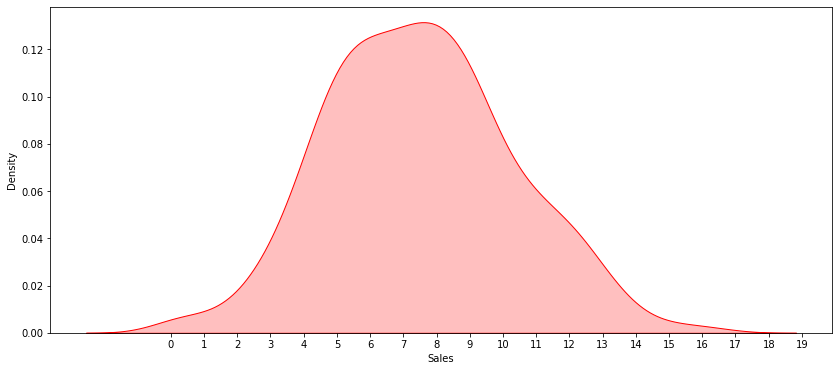

In [9]:
# some visualization
plt.rcParams["figure.figsize"]=9,5
plt.figure(figsize=(14,6))
print("Skew:{}".format(df['Sales'].skew()))
print("Kurtosis:{}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='r')
plt.xticks([i for i in range (0,20,1)])
plt.show()

In [10]:

obj_colum = df.select_dtypes(include='object').columns.tolist()

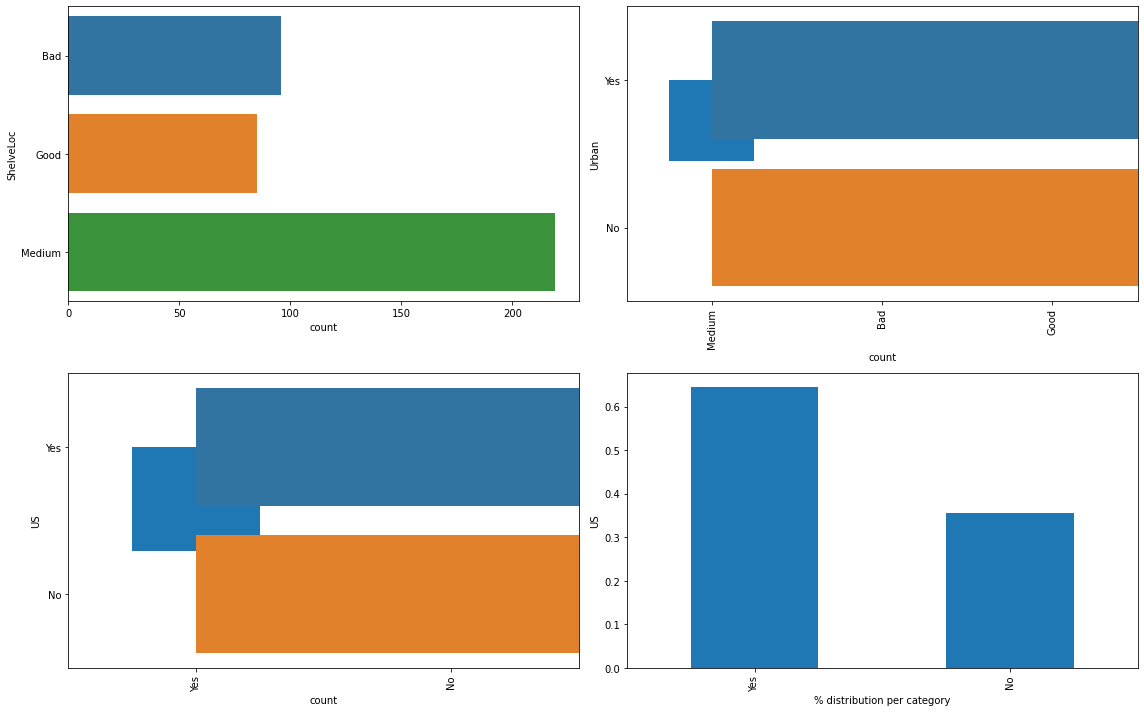

In [11]:
plt.figure(figsize=(16,10))
for i,col  in  enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [12]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

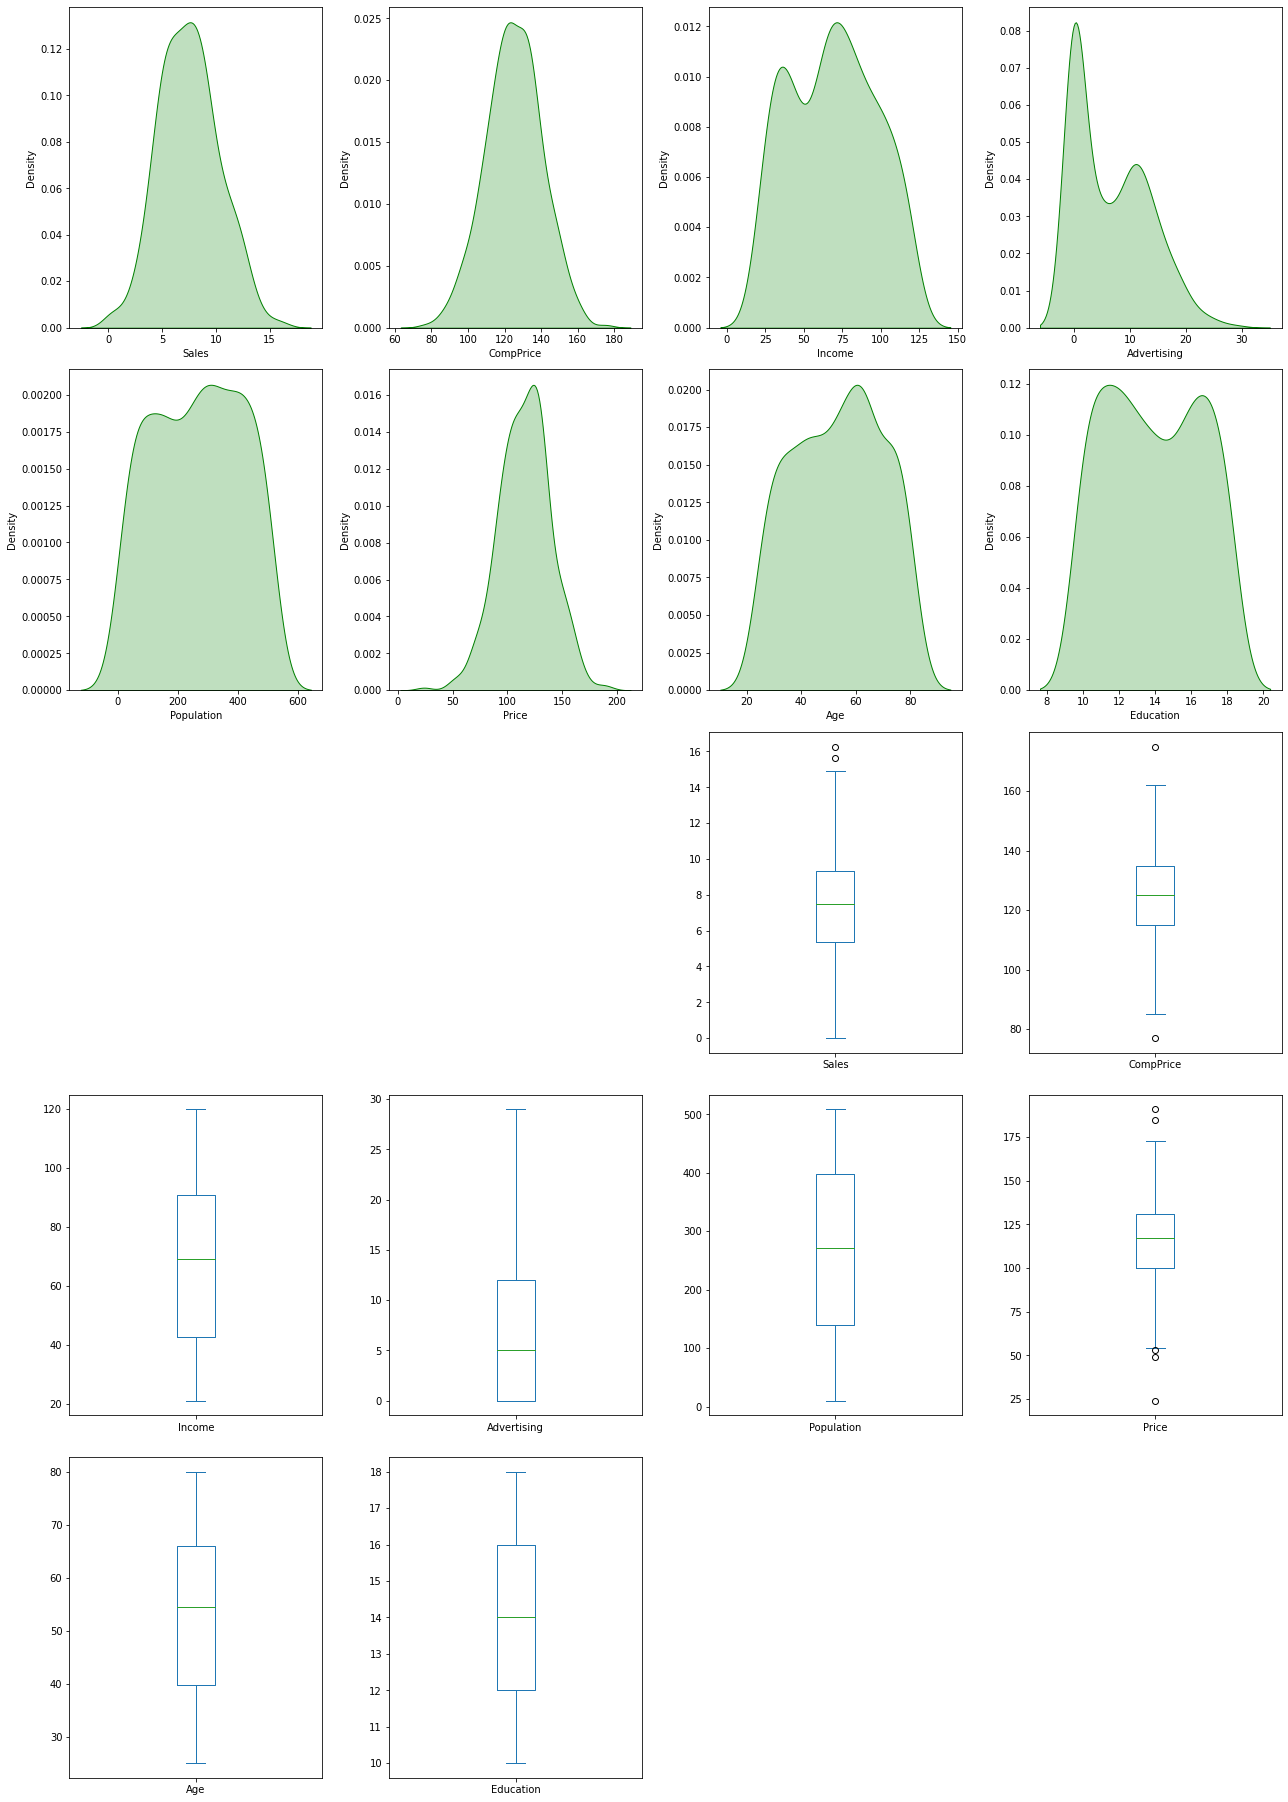

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [13]:

plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data=df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


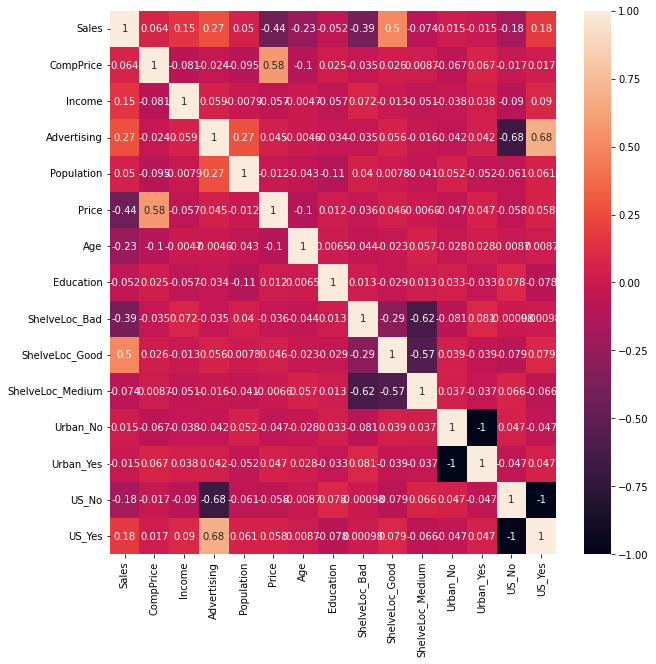

In [14]:
corr=df.corr()
df=pd.get_dummies(df,columns=['ShelveLoc','Urban','US'])
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()


# Since the target variable is continious, we create a class of the value based 
on the mean
 # <= 7.49 == "Small" and > 7.49 == "large"

In [15]:
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [16]:
X = df.iloc[:,0:14]
y = df.iloc[:,14]


In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [18]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [19]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
from sklearn import tree

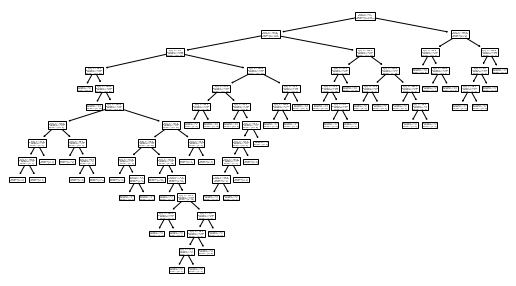

In [21]:
tree.plot_tree(model);# plot the decision tree
plt.show()

In [22]:
pred_train=model.predict(x_train)

In [23]:
accuracy_score(y_train,pred_train)

1.0

In [24]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [25]:
pred_test=model.predict(x_test)

In [26]:
accuracy_score(y_test,pred_test)

0.7125

In [27]:
confusion_matrix(y_test,pred_test)

array([[26, 14],
       [ 9, 31]], dtype=int64)

In [28]:
df_t=pd.DataFrame({'Actual':y_test,'Predicted':pred_test})

In [29]:
df_t

,Actual,Predicted
335,small,small
282,large,small
19,large,large
162,small,small
192,large,small
...,...,...
196,small,small
308,large,small
241,large,large
71,small,small


In [30]:

from sklearn.tree import DecisionTreeClassifier as DT

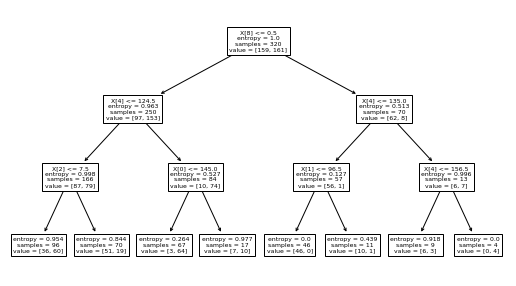

In [31]:
##Building Decision Tree Classifier using Entropy Criteria and max_depth = 3
model2=DT(criterion='entropy', max_depth=3)
model2.fit(x_train,y_train)
DT(criterion='entropy', max_depth=3)
tree.plot_tree(model2); #plot the decision tree
plt.show()

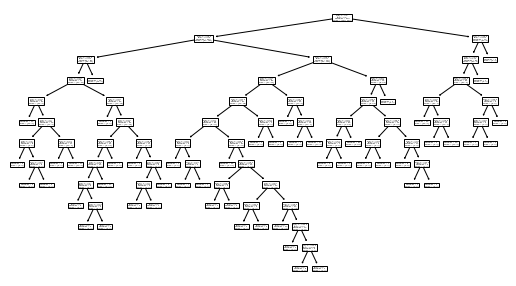

In [32]:
### Building Decision Tree Classifier (CART) using Gini Criteria
model_gini = DT(criterion='gini')
model_gini.fit(x_train, y_train)
DT()
tree.plot_tree(model_gini); #PLot the decision tree
plt.show()

# Question 2
 # Fraud check
# Use decision trees to prepare a model on fraud data treating those who have taxableincome <= 30000 as "Risky" and others are "Good"

In [33]:
# Import data and display first 5 rows
features=pd.read_csv(r"C:\Users\Asus\Downloads\Fraud_check.csv")
features.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [34]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [35]:
features.shape

(600, 6)

In [36]:
features.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [37]:
features.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [38]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(features,columns=['Undergrad','Urban'],drop_first=True)
df

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,Single,68833,50047,10,0,1
1,Divorced,33700,134075,18,1,1
2,Married,36925,160205,30,0,1
3,Single,50190,193264,15,1,1
4,Married,81002,27533,28,0,0
...,...,...,...,...,...,...
595,Divorced,76340,39492,7,1,1
596,Divorced,69967,55369,2,1,1
597,Divorced,47334,154058,0,0,1
598,Married,98592,180083,17,1,0


In [39]:
df.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,Single,68833,50047,10,0,1
1,Divorced,33700,134075,18,1,1
2,Married,36925,160205,30,0,1
3,Single,50190,193264,15,1,1
4,Married,81002,27533,28,0,0


In [40]:
df['Marital.Status'].unique()
df['Marital.Status']=df['Marital.Status'].map({'single':1,'Divorced':2,'Married':3})
print(df.head())

   Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0             NaN           68833            50047               10   
1             2.0           33700           134075               18   
2             3.0           36925           160205               30   
3             NaN           50190           193264               15   
4             3.0           81002            27533               28   

   Undergrad_YES  Urban_YES  
0              0          1  
1              1          1  
2              0          1  
3              1          1  
4              0          0  


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


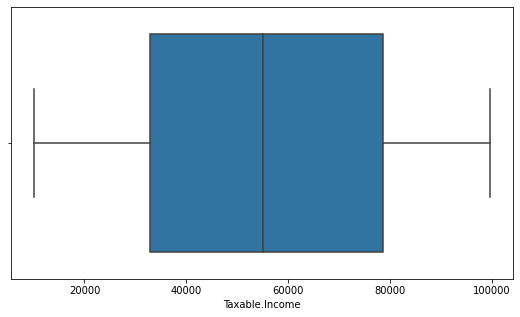

In [41]:
sns.boxplot(df['Taxable.Income'])
plt.show()

In [42]:
df.describe()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
count,383.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2.506527,55208.375000,108747.368333,15.558333,0.520000,0.503333
std,0.500611,26204.827597,49850.075134,8.842147,0.500017,0.500406
min,2.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,2.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,3.000000,55074.500000,106493.500000,15.000000,1.000000,1.000000
75%,3.000000,78611.750000,150114.250000,24.000000,1.000000,1.000000
max,3.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


In [43]:
df['Tax.Income']=df['Taxable.Income'].map(lambda x:'Risky' if x>30000 else 'Good')
df.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Tax.Income
0,NaN,68833,50047,10,0,1,Risky
1,2.0,33700,134075,18,1,1,Risky
2,3.0,36925,160205,30,0,1,Risky
3,NaN,50190,193264,15,1,1,Risky
4,3.0,81002,27533,28,0,0,Risky


In [44]:
df.drop(['Taxable.Income'],axis=1,inplace=True)
df.head()

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Tax.Income
0,NaN,50047,10,0,1,Risky
1,2.0,134075,18,1,1,Risky
2,3.0,160205,30,0,1,Risky
3,NaN,193264,15,1,1,Risky
4,3.0,27533,28,0,0,Risky


In [45]:
x=df.iloc[:0:5]
y=df['Tax.Income']

In [46]:
x
y

0      Risky
1      Risky
2      Risky
3      Risky
4      Risky
       ...  
595    Risky
596    Risky
597    Risky
598    Risky
599    Risky
Name: Tax.Income, Length: 600, dtype: object

In [47]:
df['Tax.Income'].unique()

array(['Risky', 'Good'], dtype=object)

In [48]:
colnames=list(df.columns)
colnames

['Marital.Status',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Urban_YES',
 'Tax.Income']

In [49]:
model = DT(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

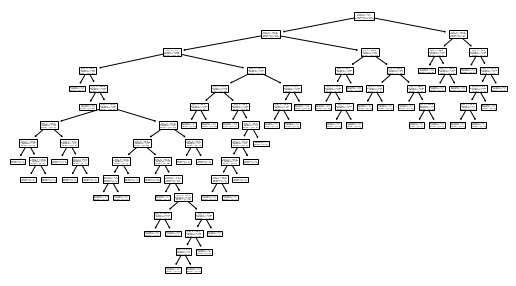

In [50]:
tree.plot_tree(model); # plot the decision tree
plt.show()

In [53]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

small    45
large    35
dtype: int64

In [54]:
preds

array(['small', 'small', 'large', 'small', 'small', 'large', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'large', 'small',
       'large', 'small', 'large', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'large', 'large', 'small', 'large',
       'large', 'small', 'large', 'small', 'large', 'large', 'small',
       'small', 'small', 'small', 'large', 'large', 'large', 'small',
       'small', 'small', 'large', 'large', 'small', 'large', 'large',
       'large', 'large', 'large', 'large', 'small', 'large', 'large',
       'small', 'large', 'small', 'small', 'large', 'small', 'small',
       'large', 'small', 'small'], dtype=object)

In [55]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,large,small
sales,,
large,27,13
small,8,32
